# Прогноз увольнения сотрудников компании

**План:**  
1) Ранее были отобраны данные для составления витрины признаков, необходимых для анализа и предсказания вероятности увольнения сотруников:
- Выгрузили данные из баз данных
- Сделали предварительную пред обработку данных
- Сформировали новые признаки (feature selections)
- Соеденили данные


**Далее необходимо**  
1) Осуществить разведовательный анализ данных (EDA)

2) Предобработка данных (data preprocessing)

3) Разделение выборки на тренировочную и валидационную

4) Выбор модели

5) Подбор гипперпараметров модели

6) Анализ результатов

7) Сохранение резльтатов

**Цель:**  
Получение таблицы с данными по увольняющимся сотрудниками в виде прогноза увольнения

Данны были полученны ввиде таблиц в формате csv и дальнейшем соеденены в одну таблицу, основной таблцей была таблица с численностью персонала со статусом уволен и к ней присоеденялись остальные таблицы после предобработки, ключ - "employee_id".

**Логика отбора признаков:**  
Данные отбирались уитывая корреляцию признаков с таргетом и на их основе генерировались признаки необходимые для выполнения поставленной задчи:

**Значение признаков**:  
`employee_id` - id сотрудника, 
`name` - фио сотрудника,  
`male` - пол,  
`age` - возраст,  
`experience` - опыт в днях,  
`use_email_total` - вход в почту итого за анализируемый период,  
`active_use_email` - количество активных дней использования почты за анализируемый период,  
`use_email_last` - вход в почту итого за последний месяц перед предсказанием,  
`out_work_email_total` - отправка писем итого, вне рабочего времени,   
`out_work_email_last` - отправка писем последний месяц, вне рабочего времени,  
`out_work_internal_email_total` - отправка писем итого, внутри компании вне рабочего времени,    
`out_work_internal_email_last` - отправка писем последний месяц, внутри компании вне рабочего времени,    
`out_work_external_email_total` - отправка писем итого, внешним компаниям вне рабочего времени,    
`out_work_external_email_last` - отправка писем последний месяц, внешним компаниям вне рабочего времени,  
`cnt_text_mean_total` - среднее количество символов в отправлемых письмах за аналищируемый период,  
`cnt_text_mean_last` - среднее количество символов в отправлемых письмах в последний месяц,  
`cnt_days_pause_total` - итого количество дней между получением письма и его прочтением,  
`cnt_days_pause_last` - количество дней между получением письма и его прочтением в послений месяц,  
`cnt_4hours_later_total` - количество писем итого прочитанных более чем через 4 часа,  
`cnt_4hours_later_last` - количество писем в последний месяц прочитанных более чем через 4 часа,  
`cnt_question_incoming` - количество входящих сообщений, имеющих вопросительные знаки в тексте, но на которые не был направлен ответ,  
`cnt_address_hidden_copy_last` - количество сообщений с адресатами в поле «скрытая копия» в последний месяц,  
`cnt_address_hidden_copy_total` - количество сообщений с адресатами в поле «скрытая копия» итого за период,  
`cnt_address_copy_last` - количество сообщений с адресатами в поле "копия", в последний месяц,  
`cnt_address_copy_total` - количество сообщений с адресатами в поле "копия", всего за период,  
`cnt_addressees` - количество адресатов в отправляемых сообщениях,
`total_letters_total` - итого отправленных писем,  
`total_letters_last` - количество писем отправленных в последний месяц,   
`external_email_total` - отправка писем итого, внешним компаниям,  
`external_email_last` - отправка писем последний месяц, внутри компании,  
`internal_email_total` - отправка писем итого, внутри компании,   
`internall_email_last` - отправка писем последний месяц, внутри компании,  
`received_total` - итого полученных сообщений,    
`received_last` - полученные сообщения в последний месяц,    
`answer_total` - итого сообщенний на который направлен ответ,   
`answer_last` -  сообщенния за последний месяц на который направлен ответ,   
`div_UseEmail` - отношение последнего месяца к итого использования почтой,   
`div_answer_UseEmail` - отношение количества отвеченных писем к использованию почтой за последний месяц,  
`div_base_KM` - отношения количества отвеченных писем к полученным за последний месяц,  
`div_sent_received_total` - отношение количества полученных и отправленных писем итого,  
`div_sent_received_last` - отношение количества полученных и отправленных писем в последний месяц,  
`div_bytes_emails` - отношение объема в байтах получаемых и отправляемых сообщений

## Импорт бибилиотек и основные настройки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import pydotplus
import joblib

from phik.report import plot_correlation_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline


In [2]:
pd.set_option('display.max_rows', 55)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.precision', 3)
np.set_printoptions(precision=3, suppress=True)
warnings.filterwarnings('ignore')

In [3]:
RS = 42

In [4]:
#тренировочные данные
df_train = pd.read_csv('train_hr_pred_new.csv')
df_train.head()

name  employee_id  male  age  experience  \
0           Чернова Оксана Петровна          612     0   53        1728   
1            Борисова Ирина Ильична          537     0   44        1709   
2        Баранова Валерия Борисовна          137     0   32        1687   
3  Захарова Екатерина Александровна          596     0   44        1629   
4          Наумова Надежда Игоревна          120     0   45        1588   

   use_email_total  active_use_email  use_email_last  \
0              351                12              59   
1              484                12              79   
2              280                12              45   
3              394                12              55   
4              385                12              56   

   out_work_internal_email_total  out_work_internal_email_last  \
0                             21                             2   
1                              6                             0   
2                             13                             2   
3                              9                             2   
4                             17                             2   

   out_work_external_email_total  out_work_external_email_last  \
0                             13                             0   
1                              5                             0   
2                             11                             2   
3                              9                             0   
4                              8                             0   

   cnt_days_pause_total  cnt_days_pause_last  cnt_4hours_later_total  \
0                     1                    1                       7   
1                     1                    1                       7   
2                     1                    1                       3   
3                     0                    5                      12   
4                     0                    0                       9   

   cnt_4hours_later_last  total_letters_total  total_letters_last  \
0                      1                  886                  63   
1                      2                  753                  42   
2                      1                  818                  45   
3                      7                  862                  50   
4                      1                  555                  43   

   received_total  received_last  answer_total  answer_last  \
0            3166            122           208           24   
1            1473             42           250           36   
2            2318            340           133           10   
3            1942            227           240           13   
4            2175            161           186           17   

   out_work_email_total  out_work_email_last  external_email_total  \
0                    34                    2                   338   
1                    11                    0                   342   
2                    24                    4                   374   
3                    18                    2                   431   
4                    25                    2                   177   

   external_email_last  internal_email_total  internal_email_last  \
0                   24                   548                   39   
1                   19                   411                   23   
2                   20                   444                   25   
3                   25                   431                   25   
4                   13                   378                   30   

   cnt_addressees  cnt_address_copy_total  cnt_address_copy_last  \
0               1                     363                     28   
1               3                     474                     24   
2               3                     343                     30   
3               4                     637                     24   
4               3                     321     

In [5]:
#Тестовые данные
df_test = pd.read_csv('test_hr_pred_new.csv')
df_test

name  employee_id  male  age  experience  \
0             Чернова Оксана Петровна          612     0   53        1728   
1              Борисова Ирина Ильична          537     0   44        1709   
2          Баранова Валерия Борисовна          137     0   32        1687   
3    Захарова Екатерина Александровна          596     0   44        1629   
4            Наумова Надежда Игоревна          120     0   45        1588   
..                                ...          ...   ...  ...         ...   
154      Чернова Ангелина Геннадьевна          859     0   33          36   
155         Лазарева Ирина Аркадьевна          783     0   30          35   
156      Васильева Виктория Антоновна          465     0   31        1933   
157       Михайлова Ольга Анатольевна          428     0   44        1877   
158             Князева Арина Ильична          865     0   37        1939   

     use_email_total  active_use_email  use_email_last  \
0                388                12              63   
1                517                12              65   
2                301                12              42   
3                432                12              63   
4                415                12              45   
..               ...               ...             ...   
154              153                 2              69   
155              140                 2              42   
156              665                12             127   
157              674                12              78   
158             1418                12             156   

     out_work_internal_email_total  out_work_internal_email_last  \
0                               22                             2   
1                                5                             0   
2                               13                             1   
3                               10                             1   
4                               17                             2   
..                             ...                           ...   
154                              2                             1   
155                              0                             0   
156                             34                             3   
157                             34                             2   
158                              9                             1   

     out_work_external_email_total  out_work_external_email_last  \
0                               12                             0   
1                                4                             0   
2                               11                             0   
3                               10                             1   
4                                7                             0   
..                             ...                           ...   
154                              0                             0   
155                              0                             0   
156                             15                             2   
157                             10                             0   
158                             14                             1   

     cnt_days_pause_total  cnt_days_pause_last  cnt_4hours_later_total  \
0                       0                    5                      11   
1                       3                    1                       2   
2                       3                    4                      46   
3                       0                    1                      15   
4                       1                    0                      13   
..                    ...                  ...                     ...   
154                     4                    4                      40   
155                     2                    1                      37   
156                     1                    1                      17   
157                     1            

- active_use_email- последнии месяцы использования почты, т.е. 12 месяцев использования почту если сотрудник работал более 12 мес и фактическое если отработал менее 12 месяцев.
- total - все признаки оканчивающиеся на total имеют агрегированное значение, всего за активный период использвания почты(active_use_email)
- last - для уволенных последний месяц перед увольнением, для действующих последний месяц active_use_email

## Просмотр данных

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           279 non-null    object 
 1   employee_id                    279 non-null    int64  
 2   male                           279 non-null    int64  
 3   age                            279 non-null    int64  
 4   experience                     279 non-null    int64  
 5   use_email_total                279 non-null    int64  
 6   active_use_email               279 non-null    int64  
 7   use_email_last                 279 non-null    int64  
 8   out_work_internal_email_total  279 non-null    int64  
 9   out_work_internal_email_last   279 non-null    int64  
 10  out_work_external_email_total  279 non-null    int64  
 11  out_work_external_email_last   279 non-null    int64  
 12  cnt_days_pause_total           279 non-null    int

In [7]:
df_train.describe()

employee_id     male      age  experience  use_email_total  \
count      279.000  279.000  279.000     279.000          279.000   
mean       491.172    0.384   39.649     406.122          300.473   
std        231.275    0.487    8.666     508.328          244.400   
min        100.000    0.000   19.000      28.000           17.000   
25%        295.000    0.000   34.000      76.500           99.000   
50%        472.000    0.000   40.000     189.000          224.000   
75%        684.500    1.000   45.000     534.000          456.000   
max        906.000    1.000   62.000    2792.000         1527.000   

       active_use_email  use_email_last  out_work_internal_email_total  \
count           279.000         279.000                        279.000   
mean              6.376          60.283                          5.685   
std               4.297          31.751                          8.057   
min               1.000           1.000                          0.000   
25%               2.000          35.500                          0.000   
50%               5.000          60.000                          2.000   
75%              12.000          83.500                          8.000   
max              12.000         153.000                         36.000   

       out_work_internal_email_last  out_work_external_email_total  \
count                       279.000                        279.000   
mean                          0.663                          3.337   
std                           1.070                          5.373   
min                           0.000                          0.000   
25%                           0.000                          0.000   
50%                           0.000                          1.000   
75%                           1.000                          5.000   
max                           8.000                         43.000   

       out_work_external_email_last  cnt_days_pause_total  \
count                       279.000               279.000   
mean                          0.337                 2.538   
std                           0.679                 1.661   
min                           0.000                 0.000   
25%                           0.000                 1.000   
50%                           0.000                 3.000   
75%                           0.000                 4.000   
max                           5.000                 5.000   

       cnt_days_pause_last  cnt_4hours_later_total  cnt_4hours_later_last  \
count              279.000                 279.000                279.000   
mean                 2.301                  28.337                  5.789   
std                  1.706                  17.126                  4.041   
min                  0.000                   0.000                  0.000   
25%                  1.000                  11.000                  2.000   
50%                  2.000                  38.000                  6.000   
75%                  4.000                  43.000                  9.000   
max                  5.000                  47.000                 12.000   

       total_letters_total  total_letters_last  received_total  received_last  \
count              279.000             279.000         279.000        279.000   
mean               401.151              48.391         992.978        105.487   
std                383.821              22.084        1151.110         96.784   
min                 33.000               3.000          33.000         21.000   
25%                 87.500              34.000         111.000         38.000   
50%                241.000              44.000         485.000         72.000   
75%                642.000              57.000        1554.000        124.000   
max               1695.000             158.000        5446.000        763.000   

       answer_total  answer_last  out_work_email_total  out_work_email_last  \
count       279.000      279.000  

## Добавление новых признаков

Добавляем расчетные признаки путем вычисления отношений основных признаков

In [11]:
#Для тренировочных данных
df_train['div_UseEmail'] = df_train['use_email_last'] / df_train['use_email_total']
df_train['div_answer_UseEmail'] = df_train['answer_last'] / df_train['use_email_last']
df_train['div_TotalLetters_answer'] = df_train['answer_last'] / df_train['total_letters_last']
df_train['div_sent_received_total'] = df_train['total_letters_total'] / df_train['received_total']
df_train['div_sent_received_last'] = df_train['total_letters_last'] / df_train['received_last']

In [12]:
#Для тестовых
df_test['div_UseEmail'] = df_test['use_email_last'] / df_test['use_email_total']
df_test['div_answer_UseEmail'] = df_test['answer_last'] / df_test['use_email_last']
df_test['div_TotalLetters_answer'] = df_test['answer_last'] / df_test['total_letters_last']
df_test['div_sent_received_total'] = df_test['total_letters_total'] / df_test['received_total']
df_test['div_sent_received_last'] = df_test['total_letters_last'] / df_test['received_last']


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           279 non-null    object 
 1   employee_id                    279 non-null    int64  
 2   male                           279 non-null    int64  
 3   age                            279 non-null    int64  
 4   experience                     279 non-null    int64  
 5   use_email_total                279 non-null    int64  
 6   active_use_email               279 non-null    int64  
 7   use_email_last                 279 non-null    int64  
 8   out_work_internal_email_total  279 non-null    int64  
 9   out_work_internal_email_last   279 non-null    int64  
 10  out_work_external_email_total  279 non-null    int64  
 11  out_work_external_email_last   279 non-null    int64  
 12  cnt_days_pause_total           279 non-null    int

## Анализа данных

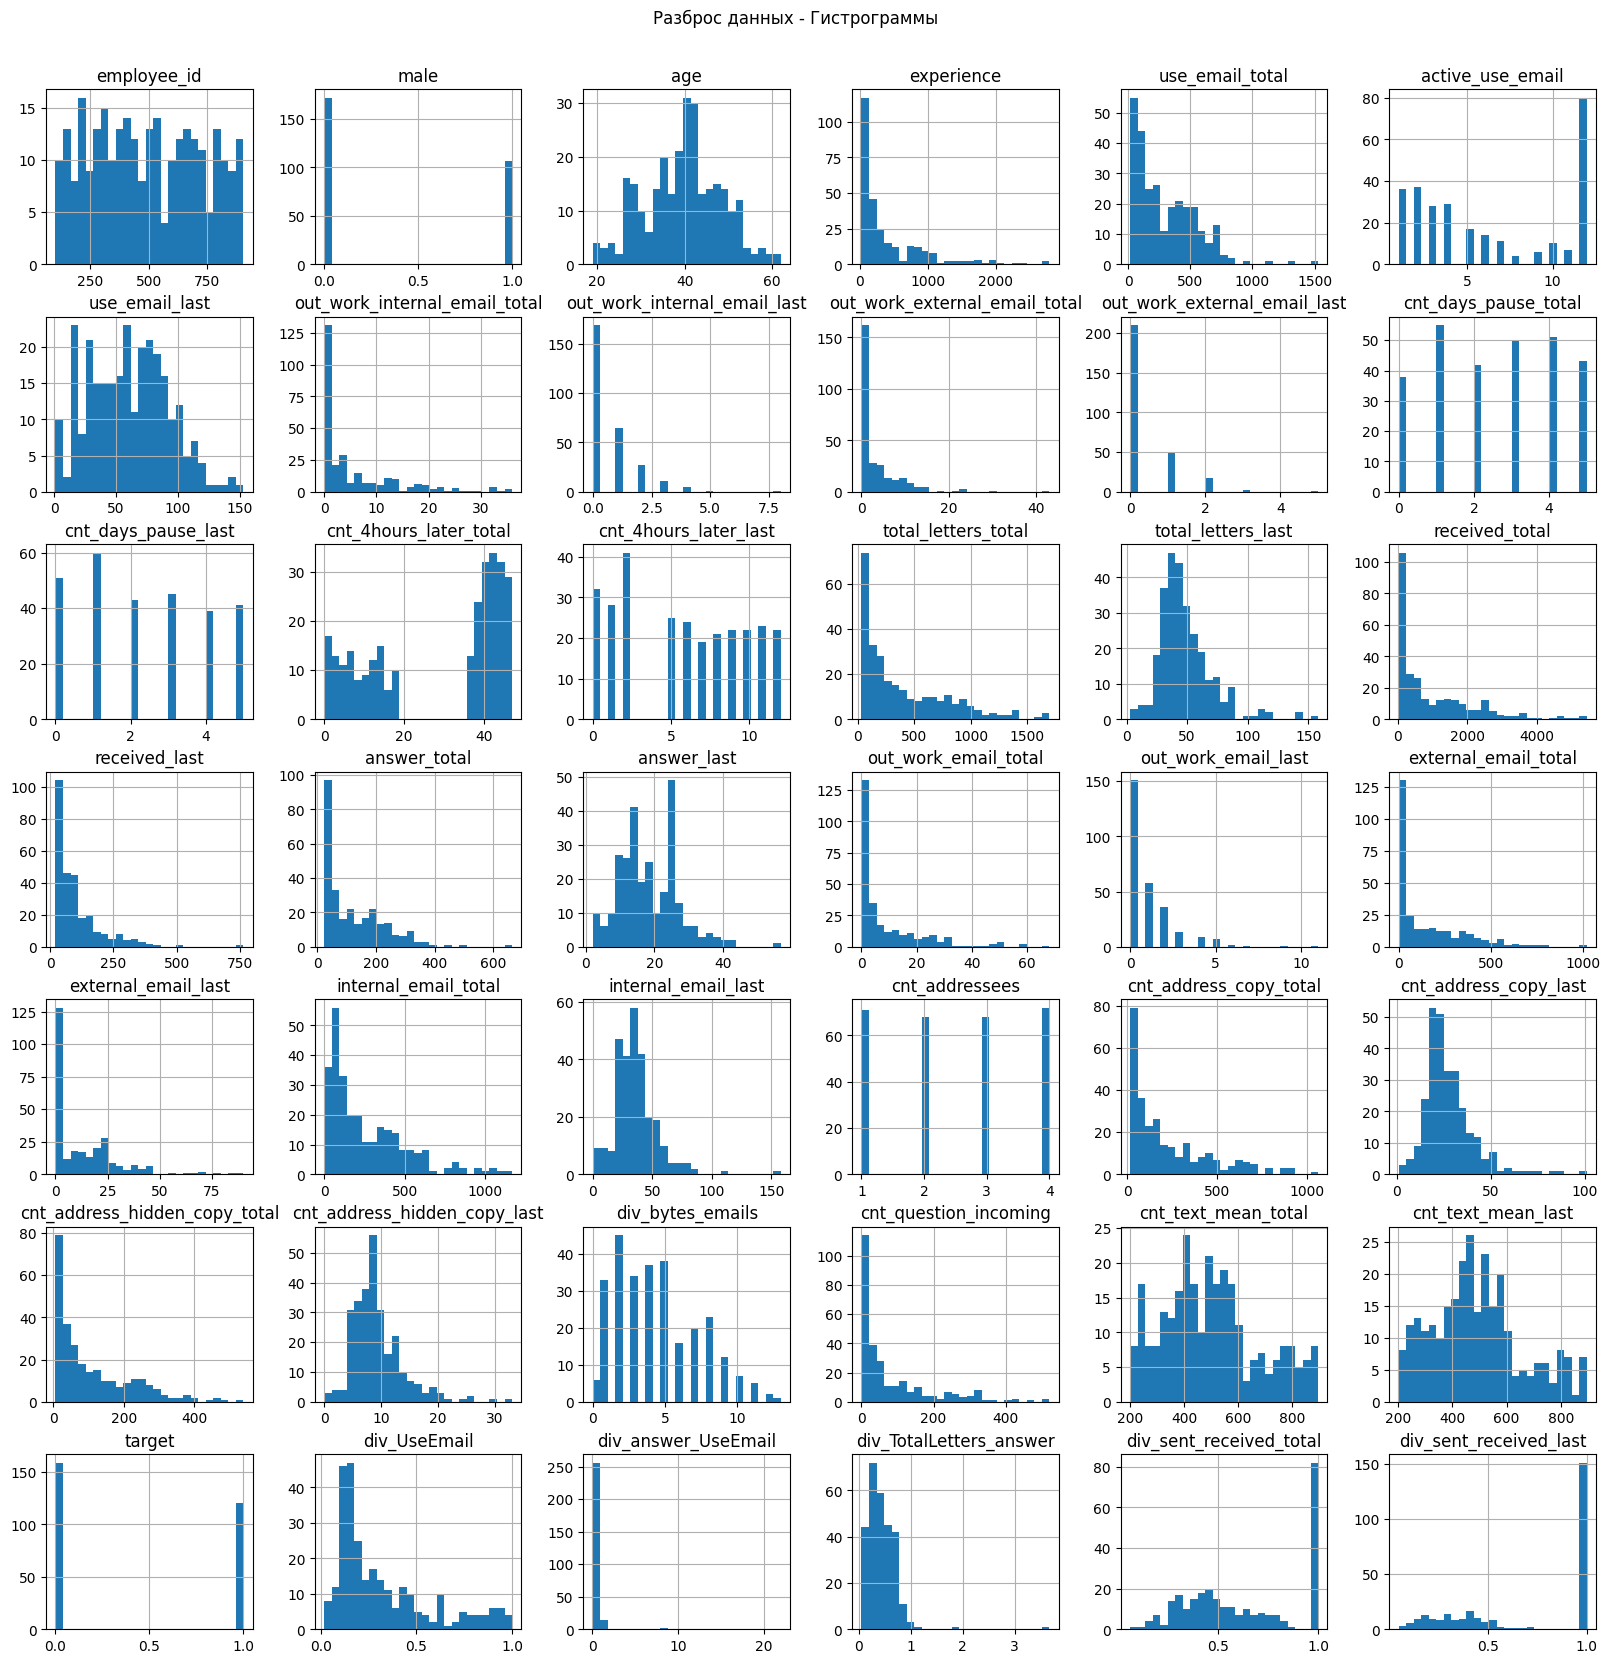

In [14]:
#Рассмотрим как распределялись данные в датасете
df_train.hist(bins=25, figsize=(20, 20))
plt.suptitle('Разброс данных - Гистрограммы', y=0.92)
plt.show()

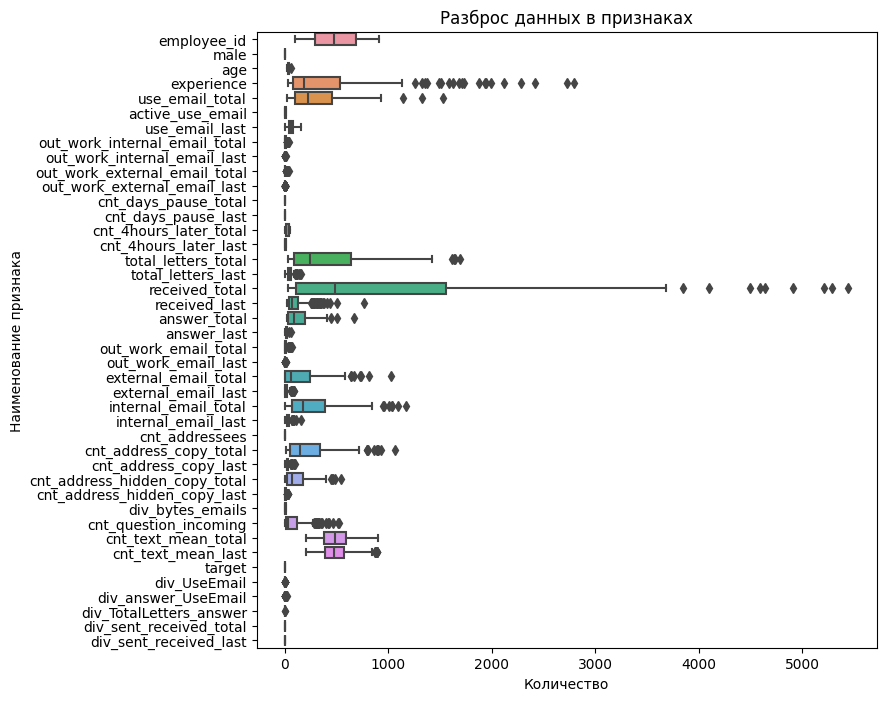

In [15]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=df_train, orient='h')
plt.title("Разброс данных в признаках")
plt.xlabel("Количество")
plt.ylabel("Наименование признака")
plt.show()

interval columns not set, guessing: ['male', 'age', 'experience', 'use_email_total', 'active_use_email', 'use_email_last', 'out_work_internal_email_total', 'out_work_internal_email_last', 'out_work_external_email_total', 'out_work_external_email_last', 'cnt_days_pause_total', 'cnt_days_pause_last', 'cnt_4hours_later_total', 'cnt_4hours_later_last', 'total_letters_total', 'total_letters_last', 'received_total', 'received_last', 'answer_total', 'answer_last', 'out_work_email_total', 'out_work_email_last', 'external_email_total', 'external_email_last', 'internal_email_total', 'internal_email_last', 'cnt_addressees', 'cnt_address_copy_total', 'cnt_address_copy_last', 'cnt_address_hidden_copy_total', 'cnt_address_hidden_copy_last', 'div_bytes_emails', 'cnt_question_incoming', 'cnt_text_mean_total', 'cnt_text_mean_last', 'target', 'div_UseEmail', 'div_answer_UseEmail', 'div_TotalLetters_answer', 'div_sent_received_total', 'div_sent_received_last']


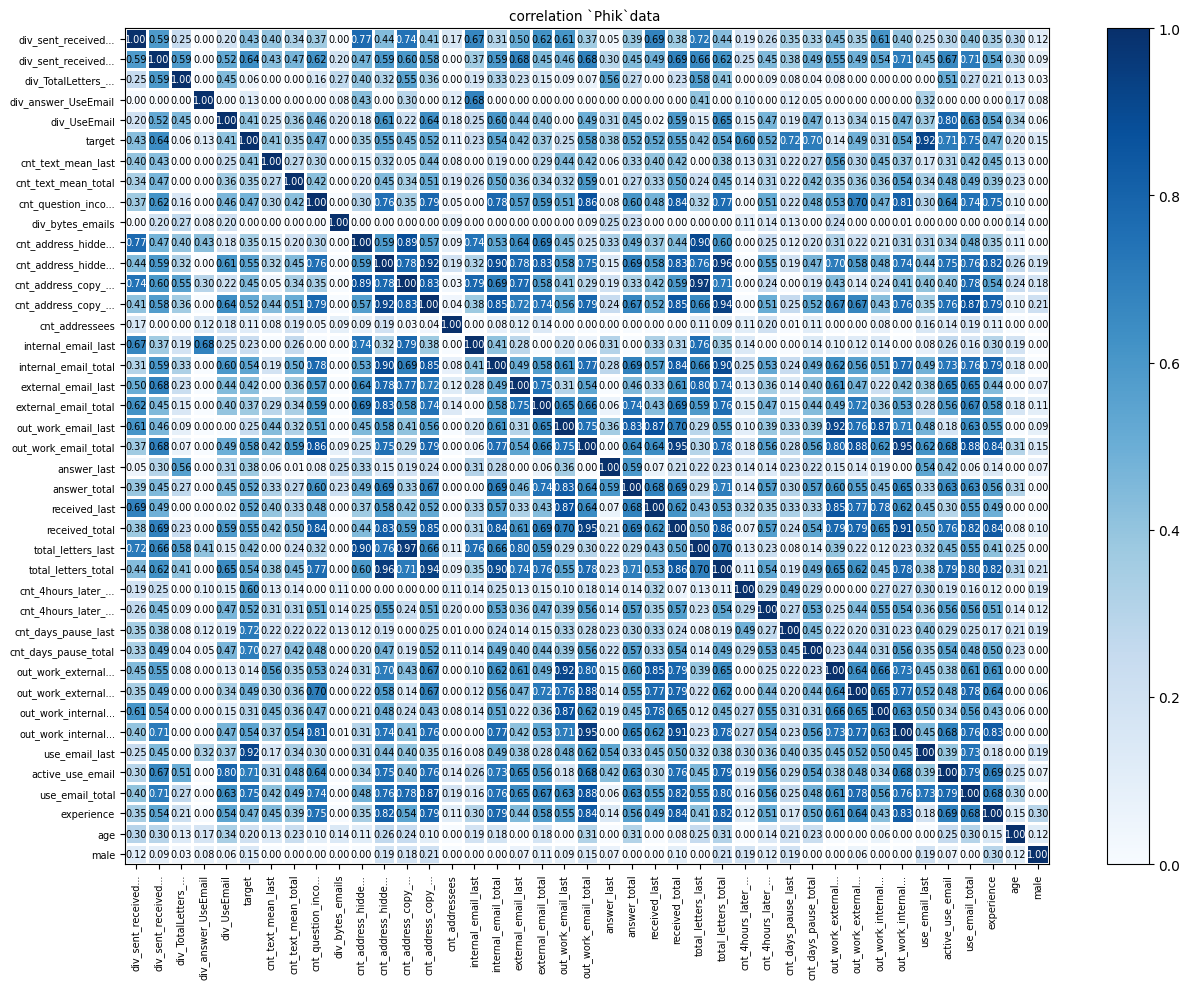

In [16]:
phik_overview = df_train.drop(['employee_id', 'name'], axis=1).phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Blues", 
                        title=r"correlation `Phik`data ", 
                        fontsize_factor=0.7, figsize=(13, 10))
plt.show()


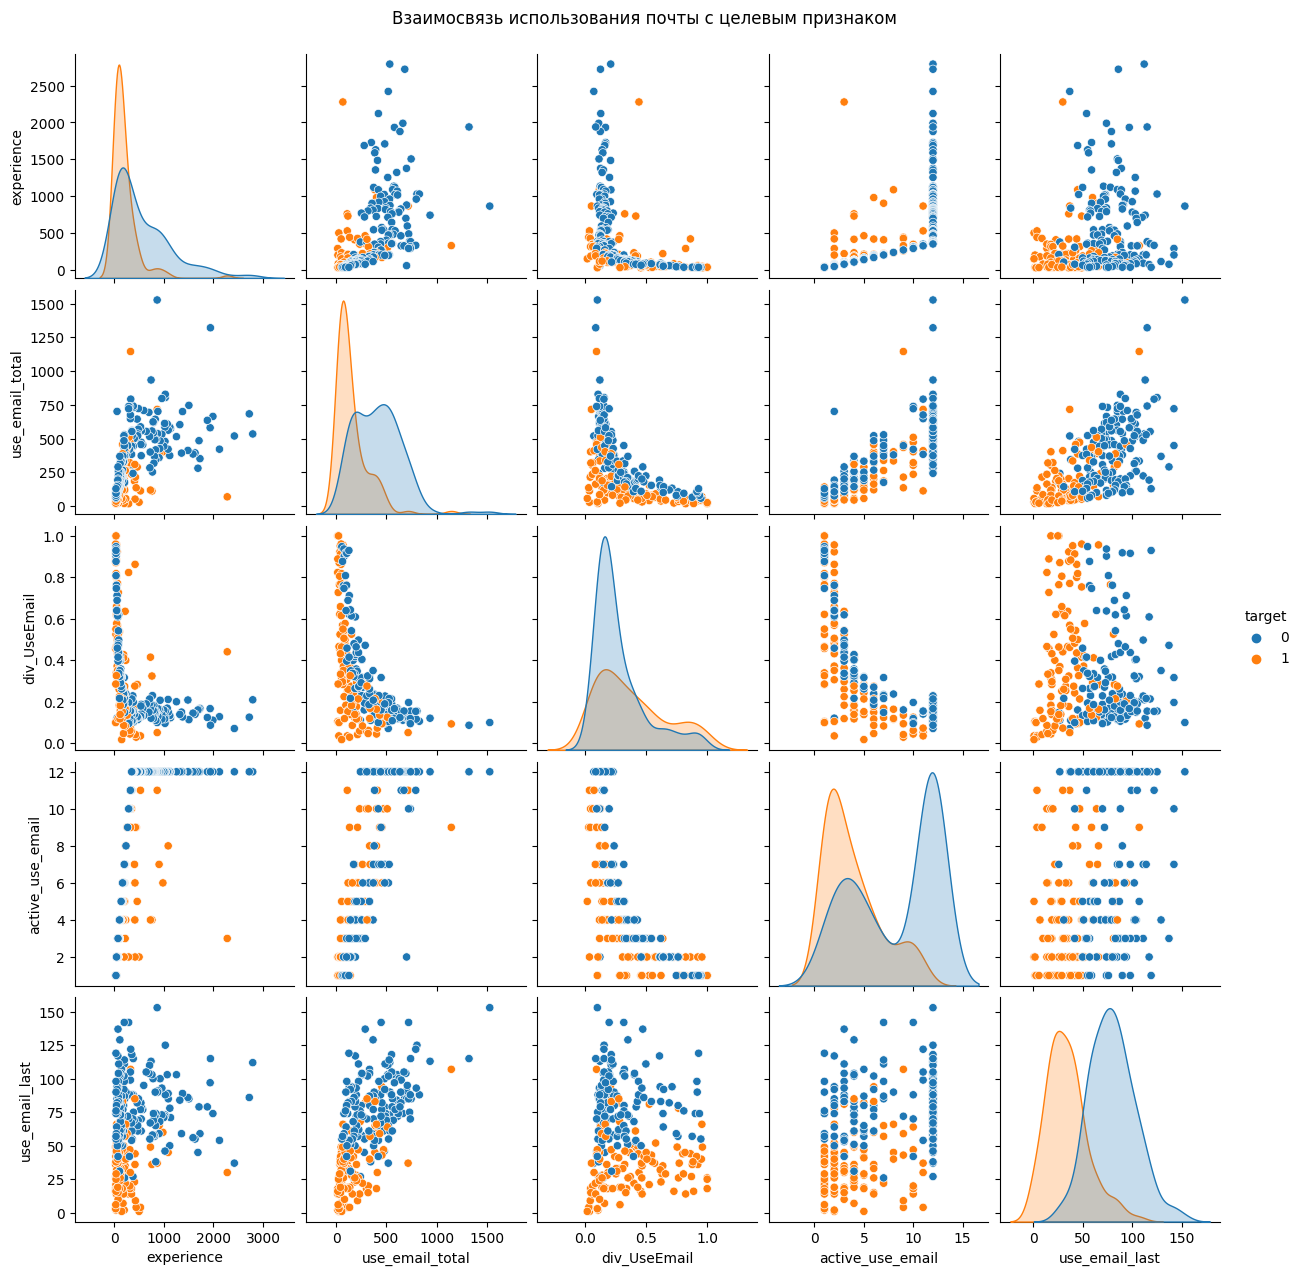

In [17]:
df_pair = df_train[['experience', 'use_email_total', 'div_UseEmail', 'active_use_email', 
                 'use_email_last', 'target']]
sns.pairplot(df_pair, hue='target')
plt.suptitle('Взаимосвязь использования почты с целевым признаком', y=1.02)
plt.show()

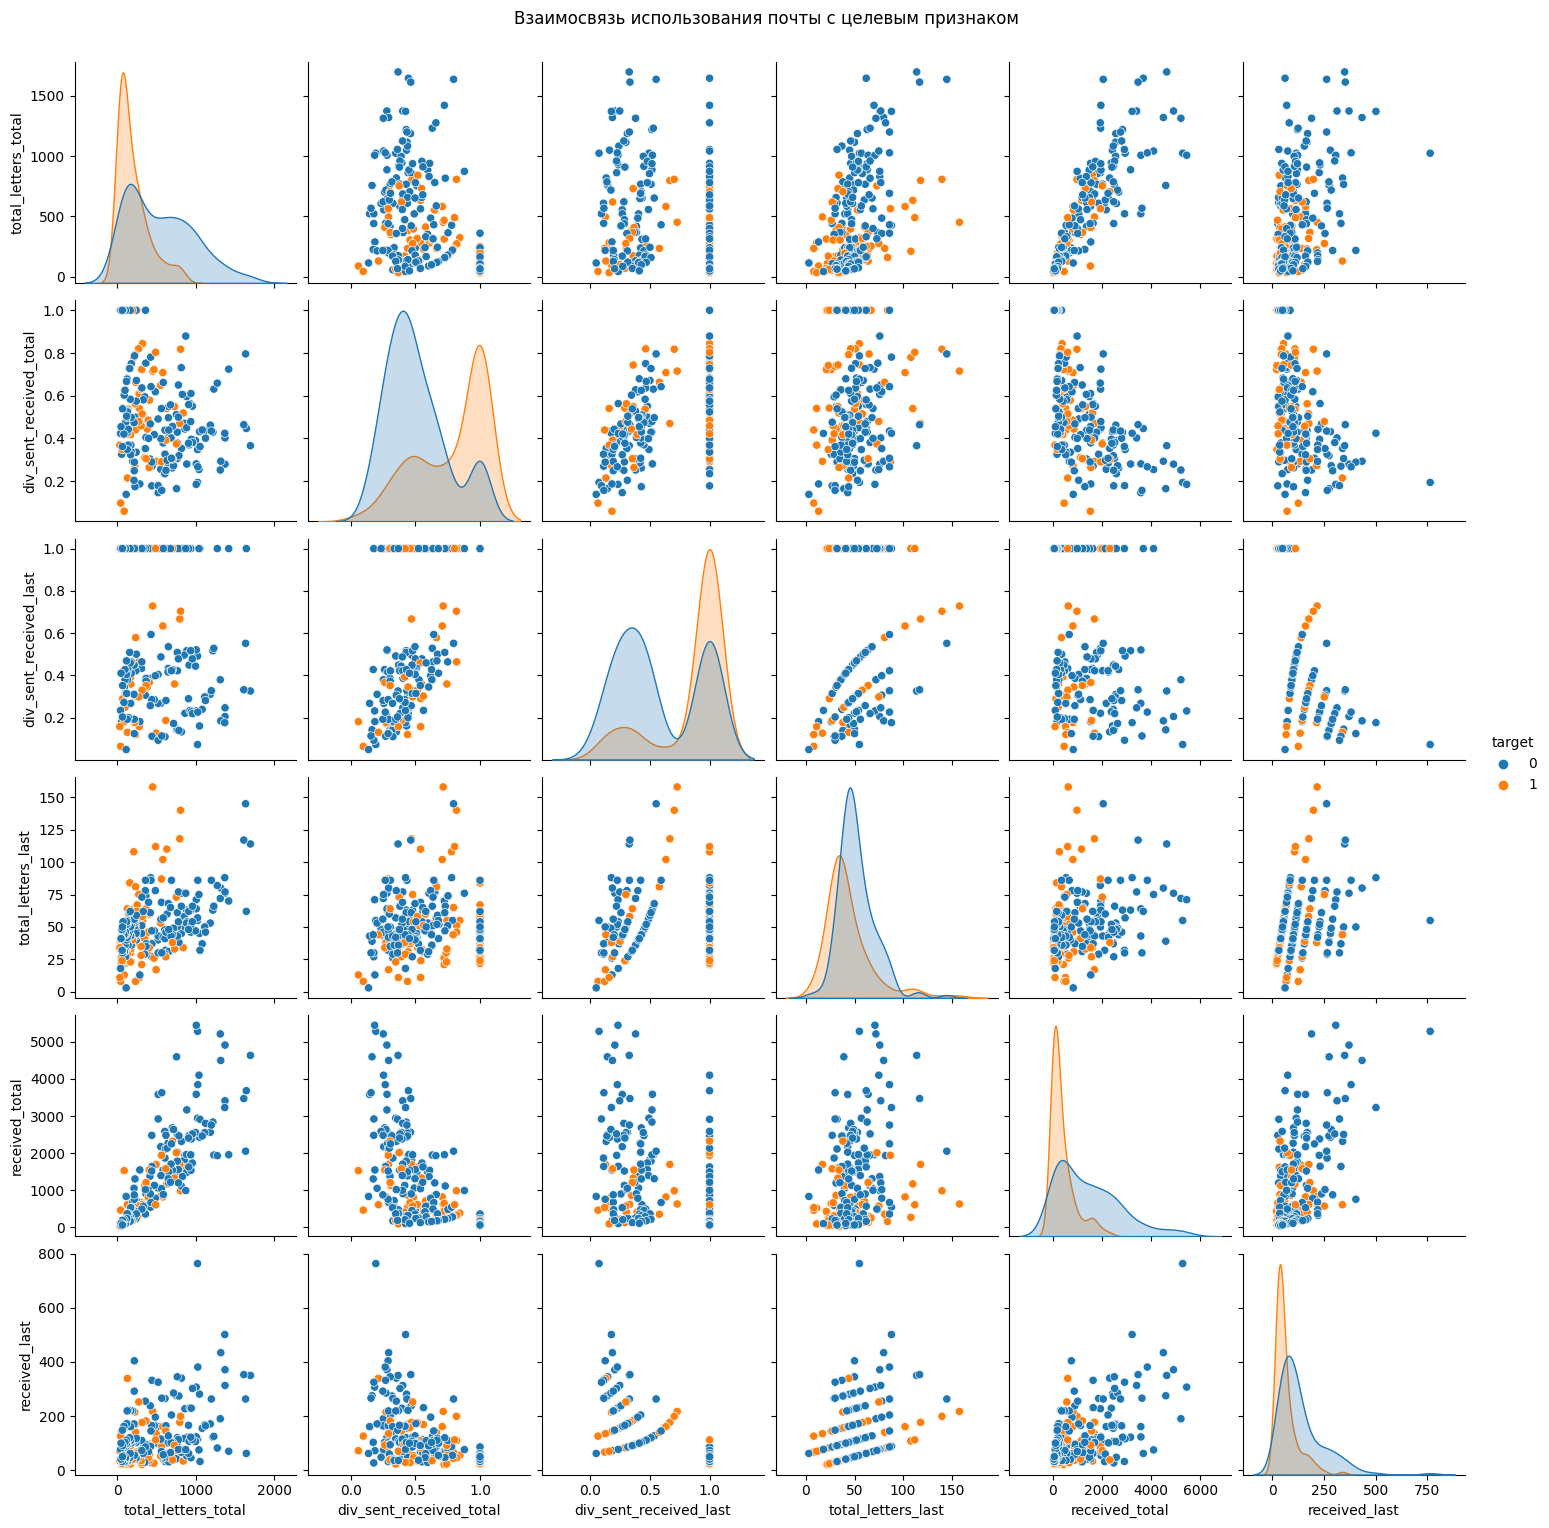

In [18]:
df_pair = df_train[['total_letters_total', 'div_sent_received_total', 'div_sent_received_last', 
                 'total_letters_last', 'received_total', 'received_last', 'target']]
sns.pairplot(df_pair, hue='target')
plt.suptitle('Взаимосвязь использования почты с целевым признаком', y=1.02)
plt.show()

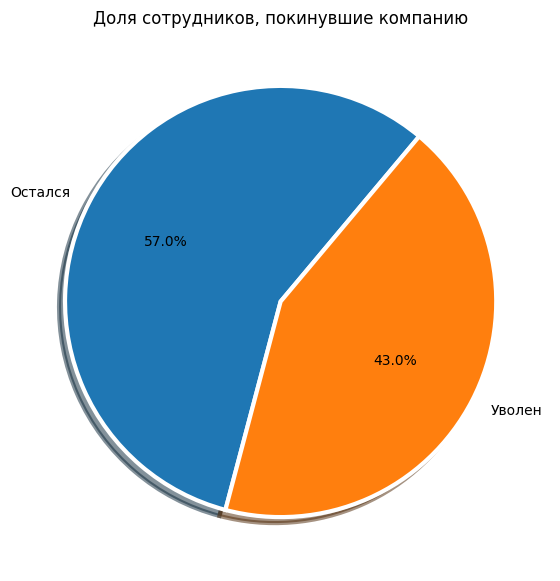

In [19]:
plt.figure(figsize=(7, 7))
plt.pie(df_train.target.value_counts(), 
        labels = ['Остался', 'Уволен'], 
        autopct='%1.1f%%',
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, 
        shadow=True, startangle=50)
plt.title('Доля сотрудников, покинувшие компанию')
plt.show()

### Создание пайплайна обучения модели и лучшей модели с подбором гипперпараметров

In [20]:
#Делим выборку
X_train = df_train.drop(['employee_id', 'name', 'target'], axis=1)
y_train = df_train['target']
X_test = df_test.drop(['employee_id', 'name'], axis=1)
print("Признаки теста", X_test.shape, "Признаки трейна", X_train.shape)
print("Уволенных в трейне -", y_train.value_counts()[1])

Признаки теста (159, 40) Признаки трейна (279, 40)
Уволенных в трейне - 120


In [21]:
#Создаем пайплайн
pipe = Pipeline([('scaler', StandardScaler()),
                 ('classify', DecisionTreeClassifier(class_weight='balanced', max_depth=12, random_state=42))])

In [22]:
%%time
#обучение и выбор лучшей модели
params = [
    {'classify': [DecisionTreeClassifier(class_weight='balanced', random_state=42)],
     'classify__max_depth': [3, 7, 10, 12],
     'classify__min_samples_split': [3, 5, 6, 7],
     'classify__min_samples_leaf': [1, 3, 5]
    },
    {'classify': [LogisticRegression(class_weight='balanced', random_state=RS)],
     'classify__penalty' : ['l2', 'l1'],
     'classify__C' : [0.01, 0.1, 1, 10, 50, 70],
     'classify__max_iter' : [100, 150, 300]
    },
    {'classify': [RandomForestClassifier(class_weight='balanced', random_state=RS)], 
     'classify__max_depth': [7, 10, 12, 13], 
     'classify__n_estimators' : range(1, 23),
    },
    {'classify': [LGBMClassifier(class_weight='balanced', random_state=RS)],
     'classify__learning_rate' : [0.01, 0.05, 0.06, 0.07], 
     'classify__max_depth' : [2, 5, 8],
     'classify__n_estimators' : [100, 200, 300, 400]
    }
]

grid_search = GridSearchCV(pipe, param_grid=params, cv=5, scoring='roc_auc')
grid_search.fit(X=X_train, y=y_train)

best_mean_validation_score = grid_search.cv_results_['mean_test_score'][grid_search.best_index_]

print(
    'Качество модели на валидации средний скоринг:', 
    {best_mean_validation_score}
)


[LightGBM] [Info] Number of positive: 96, number of negative: 127
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000952 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1596
[LightGBM] [Info] Number of data points in the train set: 223, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 96, number of negative: 127
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1615
[LightGBM] [Info] Number of data points in the train set: 223, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] S

In [23]:
print('Лучшая модель: ', grid_search.best_params_)

print(
    'Качество модели на валидации средний скоринг:', 
    {best_mean_validation_score}
)

Лучшая модель:  {'classify': RandomForestClassifier(class_weight='balanced', random_state=42), 'classify__max_depth': 10, 'classify__n_estimators': 22}
Качество модели на валидации средний скоринг: {0.9512684811827956}


In [24]:
pipe_model = pipe.fit(X_train, y_train)
pipe_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('classify',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=12,
                                        random_state=42))])

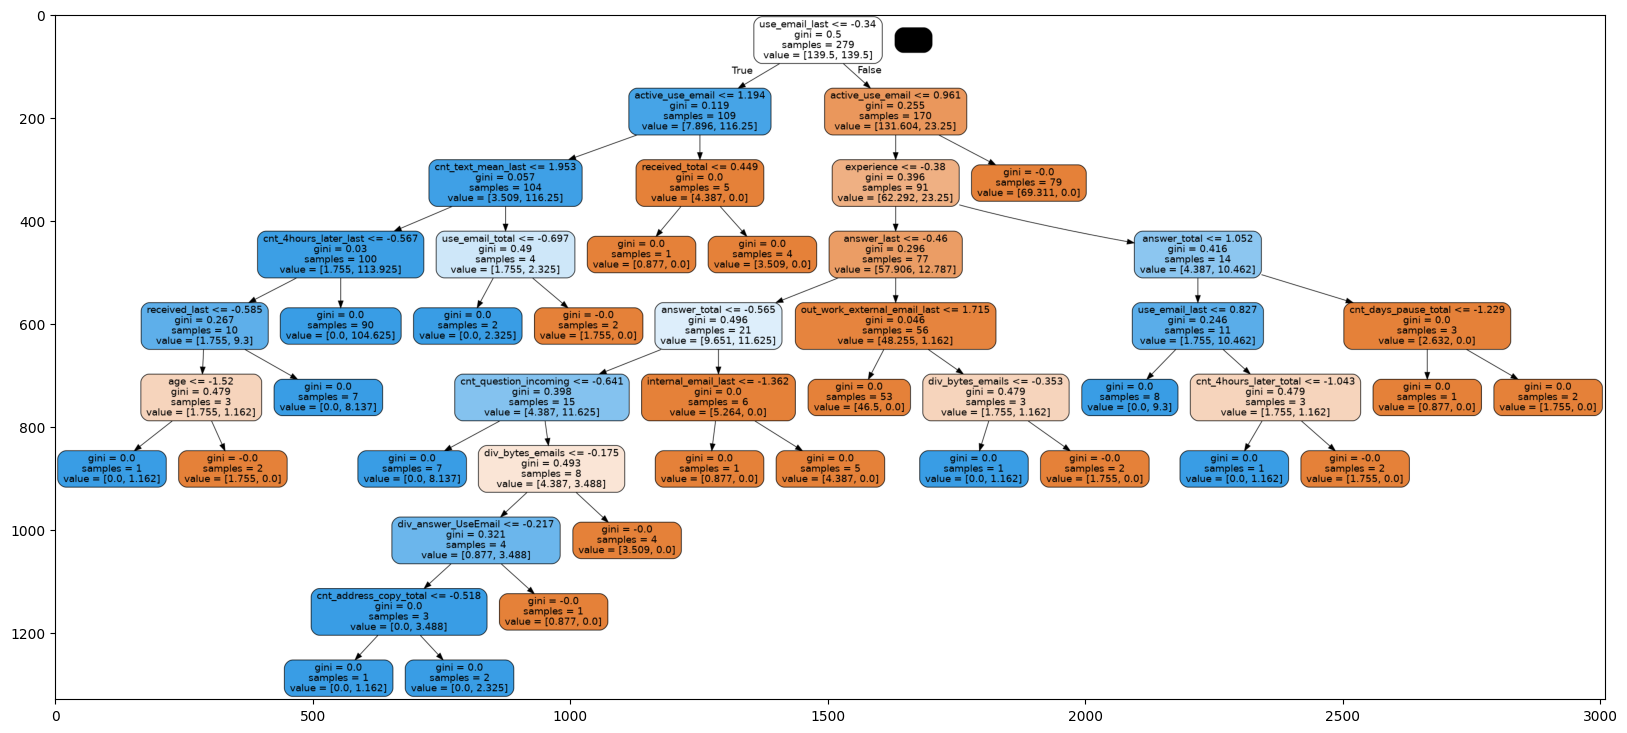

In [25]:
#выводим дерево решений
dot_data=export_graphviz(pipe_model[1],filled=True, rounded=True, feature_names=X_train.columns)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')  

plt.figure(figsize=(20, 20))
plt.imshow(plt.imread('tree.png'))
plt.show()

In [26]:
pd.concat([df_test[['employee_id']], pd.DataFrame(grid_search.best_estimator_.predict(X_test))], axis=1)

employee_id  0
0            612  0
1            537  0
2            137  0
3            596  0
4            120  0
..           ... ..
154          859  0
155          783  0
156          465  0
157          428  0
158          865  0

[159 rows x 2 columns]

In [27]:
#соеденяем предсказания
hr_pred = pd.concat([df_test[['employee_id', 'name']], pd.DataFrame(grid_search.best_estimator_.predict(X_test))], axis=1)
hr_pred = hr_pred.rename(columns={0 : 'quit'})
#соеденяем вероятности
proba_best = pd.DataFrame(grid_search.best_estimator_.predict_proba(X_test))
proba_best = proba_best.rename(columns={0 : 'probability no quit', 1 : 'probability quit'})
proba_best = pd.concat([df_test[['employee_id']], proba_best], axis=1)
proba_best[['probability no quit', 'probability quit']] = \
proba_best[['probability no quit', 'probability quit']].applymap(lambda x: int(x * 100))
#объеденяем в один файл
hr_pred = hr_pred.merge(proba_best, how='left', on='employee_id')
hr_pred.sample(5)

employee_id                               name  quit  \
152          896  Михайлова Вероника Константиновна     1   
58           297         Жукова Виктория Валериевна     1   
106          770            Петрова Марина Игоревна     0   
147          323            Павлов Мирон Германович     0   
80           461        Петрова Ангелина Николаевна     0   

     probability no quit  probability quit  
152                    9                90  
58                    45                54  
106                  100                 0  
147                  100                 0  
80                    95                 4

In [28]:
out_pred = hr_pred[hr_pred['quit'] == 1]

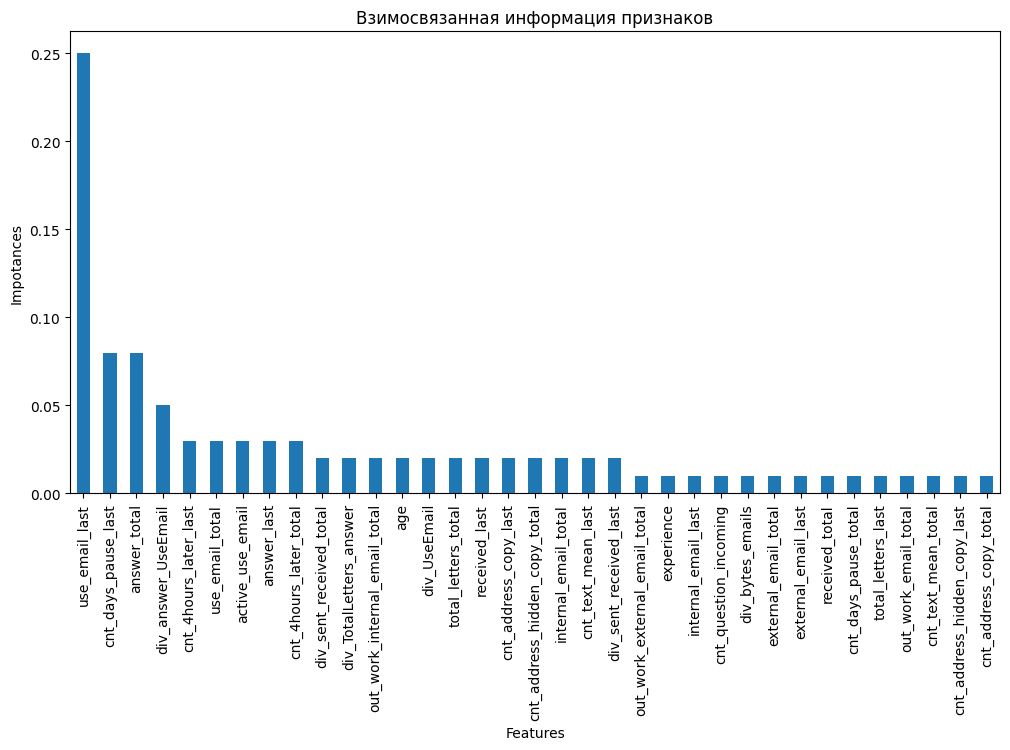

features  importances
5                  use_email_last         0.25
11            cnt_days_pause_last         0.08
18                   answer_total         0.08
36            div_answer_UseEmail         0.05
13          cnt_4hours_later_last         0.03
3                 use_email_total         0.03
4                active_use_email         0.03
19                    answer_last         0.03
12         cnt_4hours_later_total         0.03
38        div_sent_received_total         0.02
37        div_TotalLetters_answer         0.02
6   out_work_internal_email_total         0.02
1                             age         0.02
35                   div_UseEmail         0.02
14            total_letters_total         0.02
17                  received_last         0.02
28          cnt_address_copy_last         0.02
29  cnt_address_hidden_copy_total         0.02
24           internal_email_total         0.02
34             cnt_text_mean_last         0.02
39         div_sent_received_last         0.02
8   out_work_external_email_total         0.01
2                      experience         0.01
25            internal_email_last         0.01
32          cnt_question_incoming         0.01
31               div_bytes_emails         0.01
22           external_email_total         0.01
23            external_email_last         0.01
16                 received_total         0.01
10           cnt_days_pause_total         0.01
15             total_letters_last         0.01
20           out_work_email_total         0.01
33            cnt_text_mean_total         0.01
30   cnt_address_hidden_copy_last         0.01
27         cnt_address_copy_total         0.01

In [29]:
df_importances = pd.DataFrame(
    {'features' : grid_search.best_estimator_.feature_names_in_,
     'importances' : np.round(grid_search.best_estimator_[1].feature_importances_, 2)}
).sort_values(by='importances', ascending=False)
df_importances = df_importances[df_importances.importances > 0]

plt.figure(figsize = (12, 6))
df_importances.set_index('features').importances.plot(kind='bar', rot=90)
plt.xlabel('Features')
plt.ylabel('Impotances')
plt.title('Взимосвязанная информация признаков') 
plt.show()
display(df_importances)

## Список с вероятностями увольнений

In [30]:
print('Количество сотрудников под риском увольнения -', (hr_pred.quit == 1).sum())

Количество сотрудников под риском увольнения - 12


In [31]:
out_pred[['employee_id', 'name', 'probability quit']].sort_values(by='probability quit', ascending=False)

employee_id                               name  probability quit
152          896  Михайлова Вероника Константиновна                90
88           102         Артемьев Даниил Алексеевич                81
82           184             Глебов Борис Захарович                77
111          551            Потапов Федор Лукасович                72
122          871         Комарова Светлана Петровна                72
107          809            Петрова Алиса Сергеевна                68
98           238           Щербаков Денис Борисович                59
71           407         Смирнов Владимир Денисович                59
58           297         Жукова Виктория Валериевна                54
90           441        Петров Артемий Владимирович                54
99           678             Козлов Иван Николаевич                54
138          705      Князева Альбина Александровна                54

In [32]:
#Сохраняем в exel
#out_pred[['employee_id', 'probability quit']].sort_values(by='probability quit', ascending=False).to_excel('Прогноз увольнения.xlsx')
